# 1. Population Genetics Simulation

Create a program that simulates the allelic frequency in a finite diploid population for a certain number of generations.

The program takes as input the initial allele frequencies, the fitness of each genotype, the population size, and the number of generations. Because these simulations are stochastic each run of the simulation will give a different result, to allow an idea of the behavior of the allelic frequencies, your program should repeat the simulations many times for each parameter set and plot all the results in a single graph. The number of simulations should also be determined by the user. You can start your program using the variable definitions in the cell below.

Your program should output two graphs. The first should show the allele frequency at each generation, and the other should be a histogram with the final values of the allele frequency. Something like this:

![simulation](Sim1.png)

![histogram](Sim2.png)

Last year a student used this homework as the starting point for her project to create a population genetics simulator for BIOL040. You can see the final project here: http://dna.pomona.edu:5006/pop_gen_sim

In [7]:
#Packages
import random as rd
import matplotlib.pyplot as plt

#Allele frequencies
initA = 0.50
inita = 0.50

#Fitnesses
fAA = 1
fAa = 1
faa = 1

#Pop Size
pop = 1000

#Number of generations
gen = 100

#Number of simulations
sim = 100

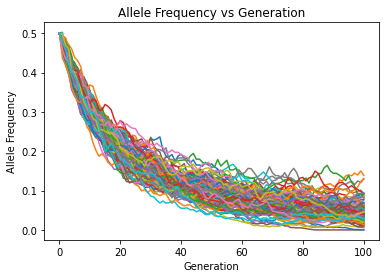

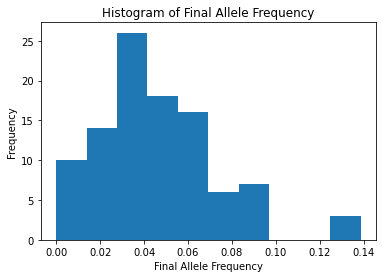

In [11]:
import random as rd
import matplotlib.pyplot as plt
#variables
initA = 0.50
inita = 0.50
fAA = 0.8
fAa = 1
faa = 1
pop = 1000
gen = 100
sim = 100

# make a list for results
all_freq_A = []
final_freq_A = []

#make a function to find the genotype frequencies
def calc_genotype_freq(freq_A):
    #freq_A = freq_a
    freq_a = 1 - freq_A
    freq_AA = freq_A**2
    freq_Aa = 2*freq_A*freq_a
    freq_aa = freq_a**2
    return freq_AA, freq_Aa, freq_aa

#make a function to find genotype frequencies
def calc_fitness(freq_AA, freq_Aa, freq_aa):
    freq_A = freq_AA * fAA + 1/2*(freq_Aa * fAa)
    freq_a = freq_aa * faa + 1/2*(freq_Aa * fAa)
    #freq_A = freq_AA + (freq_Aa/2)
    #freq_a = freq_aa + (freq_Aa/2)
    return freq_A, freq_a

#repeat the simulation
for i in range(sim):
    freq_A = initA
    freq_AA, freq_Aa, freq_aa = calc_genotype_freq(freq_A)

    #simulate pop for a certain number of generations
    freq_A_list = [freq_A]
    for j in range(gen):
        fitness_A, fitness_a = calc_fitness(freq_AA, freq_Aa, freq_aa)

        #reproduce and create the next generation
        new_gen = []
        for k in range(pop):
            parent1 = rd.choices(['A', 'a'], weights=[fitness_A, fitness_a])[0]
            parent2 = rd.choices(['A', 'a'], weights=[fitness_A, fitness_a])[0]
            #offspring = parent1 + parent2
            new_gen.append(parent1); new_gen.append(parent2)

        #calculate allele frequencies of next generation
        num_A = new_gen.count('A')
        freq_A = num_A / (2*pop)
        freq_A_list.append(freq_A)
        freq_AA, freq_Aa, freq_aa = calc_genotype_freq(freq_A)

    #store results
    all_freq_A.append(freq_A_list)
    final_freq_A.append(freq_A)

#plot allele frequency at each generation for each sim
plt.figure()
for freq_A_list in all_freq_A:
    plt.plot(freq_A_list)
plt.xlabel('Generation')
plt.ylabel('Allele Frequency')
plt.title('Allele Frequency vs Generation')
plt.show()

#plot histogram of final allele frequencies
plt.figure()
plt.hist(final_freq_A)
plt.xlabel('Final Allele Frequency')
plt.ylabel('Frequency')
plt.title('Histogram of Final Allele Frequency')
plt.show()

In [7]:
fitness_A

0.7305